# xAi-KE-ImplicitKnowledge

RQ1: quanto l'implicità di un testo impatta la feature extraction. Valutiamo la distanza fra l'answer trovata dal modello (Gpt-4omini) e la GT del dataset con SentenceBert. Avremo quindi un array di valori:

explicit_sentence_bert_distance = [0.8, 0.9, 0.7, 0.4 ...]
implicit_sentence_bert_distance = [1.3, 0.9, 0.67, 1.4 ...]

wilcoxton_distance(explicit_sentence_bert_distance, implicit_sentence_bert_distance )

RQ2: Dato un pattern di difficoltà scelto e un sottoinsieme di 4 occupation (actor, filmaker, scene writer, writer, ...). E' possibile  ridurre questa distanza allenando il modello a matchare la risposta alla sua entità? Ci servono almeno 74 punti del test quindi circa 200 per train-val-test)
- Runnare llama1B per SEQ-Class su test
- finetune llama1B con LORA per SEQ-Class su test


# Sentence Bert

In [1]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# Two lists of sentences
sentences1 = [
    "The new movie is awesome",
    "The cat sits outside",
    "A man is playing guitar",
]

sentences2 = [
    "The dog plays in the garden",
    "The new movie is so great",
    "A woman watches TV",
]

# Compute embeddings for both lists
embeddings1 = model.encode(sentences1)
embeddings2 = model.encode(sentences2)

# Compute cosine similarities
similarities = model.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The new movie is awesome
 - The dog plays in the garden   : 0.0543
 - The new movie is so great     : 0.8939
 - A woman watches TV            : -0.0502
The cat sits outside
 - The dog plays in the garden   : 0.2838
 - The new movie is so great     : -0.0029
 - A woman watches TV            : 0.1310
A man is playing guitar
 - The dog plays in the garden   : 0.2277
 - The new movie is so great     : -0.0136
 - A woman watches TV            : -0.0327


## Wilcoxon Test

A p-value is a statistical measurement used to validate a hypothesis against observed data.
A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
The lower the p-value, the greater the statistical significance of the observed difference.
A p-value of 0.05 or lower is generally considered statistically significant.
P-value can serve as an alternative to—or in addition to—preselected confidence levels for hypothesis testing.

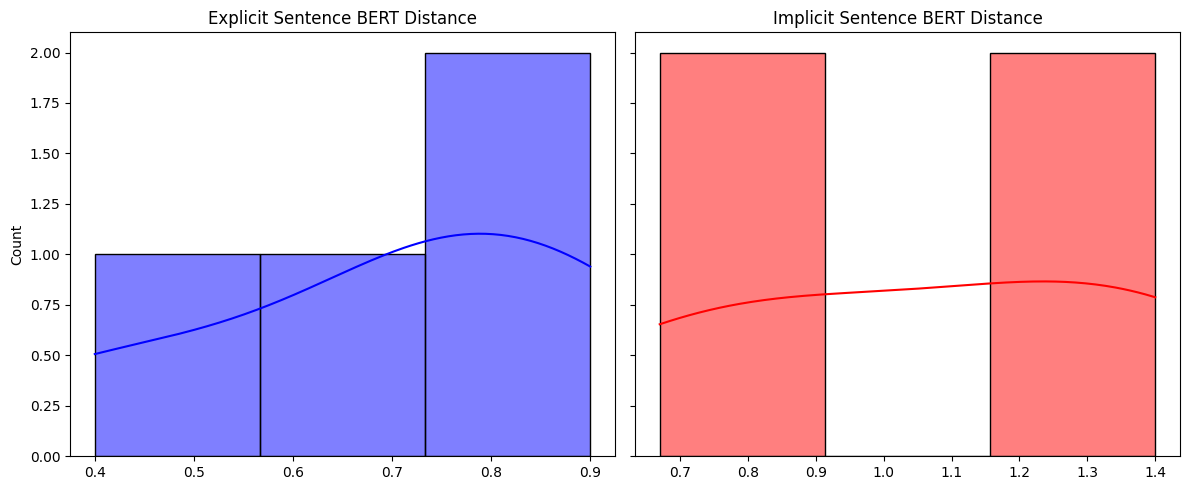

It's not statistically significant


/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:152: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=-1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_wilcoxon.py:153: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=-1)


In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

explicit_sentence_bert_distance= np.array([0.8, 0.9, 0.7, 0.4]) #to do sostituire
implicit_sentence_bert_distance = np.array([1.3, 0.9, 0.67, 1.4]) #to do sostituire

# plotto tutte e due le distanze per controllare che non siano distribuzioni normali
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

sns.histplot(data=explicit_sentence_bert_distance, ax=axes[0], kde=True, color="blue")
axes[0].set_title("Explicit Sentence BERT Distance")

sns.histplot(data=implicit_sentence_bert_distance, ax=axes[1], kde=True, color="red")
axes[1].set_title("Implicit Sentence BERT Distance")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

stats, pvalue = stats.wilcoxon(explicit_sentence_bert_distance, implicit_sentence_bert_distance, alternative='less')

if(pvalue < 0.05):
    print("It's statistically significant")
else:
    print("It's not statistically significant")